In [2]:
import argparse
from f0poly_sols_clean import f0_lambda_neq_0, f0_lambda_eq_0, f_i
from scipy.optimize import bisect, newton, curve_fit
from subprocess import call
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
sys.path.append('../')
from package_global_functions import *

### Weber law; the stimulus is the quality; fix q2 and search q1

In [28]:
def consensus_usual_eq_q1(q1, pi1, pi2, l, q2, x, mu):
    'usual definition of consensus'
    'equation to be solved numerically'
    'instead of involving the strange F factor, this uses de usual f2-x*f1'
    _, f0, _ = f0_lambda_neq_0(pi1, pi2, q1, q2, l, mu)
    f1, f2 = f_i(1, f0, [pi1, pi2], [q1, q2], l, mu), f_i(2, f0, [pi1, pi2], [q1, q2], l, mu)
    return f2 - x*f1

# def consensus_mod2_eq(l, pi1, pi2, q1, q2, x, mu):
def consensus_mod2_eq_q1(q1, pi1, pi2, l, q2, x, mu):
    'modification to consensus mod, max(f0, x*f1) instead of x*max(f0,f1)'
    'equation to ve solved numerically'
    _, f0, _  = f0_lambda_neq_0(pi1, pi2, q1, q2, l, mu)
    f1, f2 = f_i(1, f0, [pi1, pi2], [q1, q2], l, mu), f_i(2, f0, [pi1, pi2], [q1, q2], l, mu)
    return f2 - max(f0, x*f1)

# def consensus_f2_eq(l, pi1, pi2, q1, q2, x, mu):
def consensus_f2_eq_q1(q1, pi1, pi2, l, q2, x, mu):
    'modified definition of consensus, just considering f2 greater than a threshold'
    _, f0, _ = f0_lambda_neq_0(pi1, pi2, q1, q2, l, mu)
    f1, f2 = f_i(1, f0, [pi1, pi2], [q1, q2], l, mu), f_i(2, f0, [pi1, pi2], [q1, q2], l, mu)
    return f2 - x/(x+1)

0.1 [1.2642478923498857, 1.5495035344745247, 1.838795312631646, 2.1309719246439727, 2.425260735935808, 2.721131484673265, 5.7184120790622615, 8.738545140944268, 11.764705882351933, 14.793302624172355, 17.823120611813323]
0.3 [2.000000000001819, 2.4864021567370855, 2.9751306576276875, 3.4649782447993402, 3.955398440875797, 4.446124860953546, 9.356569067550993, 14.266843919017049, 19.176651920204307, 24.086211403316526, 28.995630254236204]
0.6 [3.3442675696696824, 4.087224841755187, 4.827261519827061, 5.565519950573844, 6.3026203444769635, 7.038926205504936, 14.385170355747675, 21.722635312281852, 29.05800205269648, 36.39254507364015, 43.72668055576739]
0.9 [4.6149756340837484, 5.5564641514681625, 6.49695065970036, 7.436861847706268, 8.376412328145307, 9.315721801618224, 18.70391637593542, 28.089645324935702, 37.47480366736178, 46.85974053090675, 56.244568473659996]


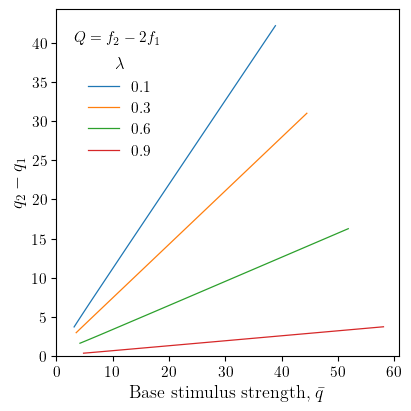

In [26]:
latexFont(titlesize=11, ticklabelssize=11, labelsize=13)

consensus_eq = consensus_usual_eq_q1
Qlabel = 'Q'

# consensus_eq = consensus_f2_eq_q1
# Qlabel = 'f2'

# consensus_eq = consensus_mod2_eq_q1
# Qlabel = 'Qmod2'


# q2s = [2.5, 5.0, 10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 100.0, 200.0]
q2s = [5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0, 30.0, 40.0, 50.0, 60.0]

ls = [0.1, 0.3, 0.6, 0.9]
# ls = [0.6, 0.9]
pi1, pi2, x, mu = 0.25, 0.1, 2, 0.0

fig, ax = plt.subplots(1,1, figsize=(4,4), constrained_layout=True)
ax.set(xlabel=r'Base stimulus strength, $\bar{q}$', ylabel='$q_2 - q_1$')
for l in ls:
    q1s = []
    for q2 in q2s:
        q1_solve_lims = [1.0,q2]
        # if np.sign(consensus_eq(q1_solve_lims[0], pi1, pi2, l, q2, x, mu)) != np.sign(consensus_eq(q1_solve_lims[0], pi1, pi2, l, q2, x, mu)):
        # print(consensus_eq(q1_solve_lims[0], pi1, pi2, l, q2, x, mu))
        # print(consensus_eq(q1_solve_lims[1], pi1, pi2, l, q2, x, mu))
        # q1 = bisect(consensus_eq, q1_solve_lims[0], q1_solve_lims[1], args=(pi1, pi2, l, q2, x, mu))
        # q1s.append(q1)
        try:
            q1 = bisect(consensus_eq, q1_solve_lims[0], q1_solve_lims[1], args=(pi1, pi2, l, q2, x, mu))
            q1s.append(q1)
        except ValueError:
            q1s.append(float('nan'))
    print(l, q1s)
    # base stimulus strenght:
    bss = [(q2+q1)/2 for q1,q2 in zip(q1s,q2s)]
    # bss = q2s
    # quality difference:
    delta_q = [(q2-q1) for q1,q2 in zip(q1s,q2s)]
    ax.plot(bss, delta_q, lw=0.9, label=f'{l}')
ax.set(ylim=(0,None), xlim=(0,None))
fig.legend(title='$\lambda$', frameon=False, fontsize=11, title_fontsize=12, loc=(0.2, 0.6))

QtextPos = (0.17, 0.91)
if Qlabel == 'Q':
    fig.text(QtextPos[0], QtextPos[1], r'$Q = f_2 - 2 f_1$', fontsize=11)
elif Qlabel == 'Qmod2':
    fig.text(QtextPos[0], QtextPos[1], r'$Q = f_2 - max(f_0, 2 f_1)$', fontsize=11)
elif Qlabel == 'f2':
    fig.text(QtextPos[0], QtextPos[1], r'$Q = f_2 - f_2^{th}$', fontsize=11)


# fig.savefig(f'test_weber_law_{Qlabel}_pi1_{pi1}_pi2_{pi2}_fix_q2_search_q1.png')
fig.savefig(f'test_weber_law_{Qlabel}_pi1_{pi1}_pi2_{pi2}_fix_q2_search_q1.pdf')


In [33]:
q1s

[1.0000000000010232,
 1.00000000000108,
 1.0000000000016485,
 1.0000000000011084,
 1.0000000000013927,
 1.0000000000016769]

[(9.819676070377653, 10), (14.739737105880872, 15), (19.659426136195965, 20), (24.578975816183583, 25), (29.49845826634317, 30), (34.417903162652294, 35), (39.337324955739916, 40), (44.25673152512044, 45), (49.17612753298219, 50), (54.09551591409968, 55), (59.014898608170235, 60), (63.934276948383534, 65)]
[0.01819645578283265, 0.017502703079891213, 0.017174926466886214, 0.016983980684771888, 0.01685898251049436, 0.016770798621900215, 0.016705253035182915, 0.01665462004219527, 0.016614330232722966, 0.016581508017478923, 0.016554253347271924, 0.016531260372958986]
For the computed q1s: m = 0.016235850626335906, n = 0.018788647796655233, R^2 = 0.9999991964407435
For the computed q1s (powerLaw): a = 0.9663674587082385, b = 0.01896787000834327
For the ideal q1s: m = 0.35294117647058826, n = 0.0, R^2 = 1.0


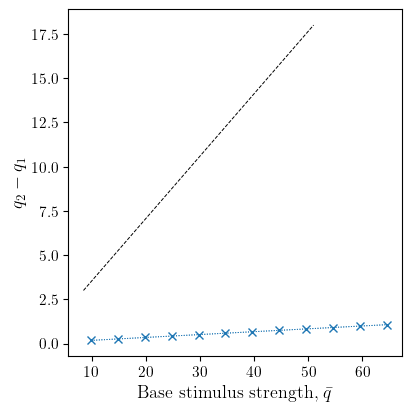

In [52]:
from scipy.stats import linregress

consensus_eq = consensus_usual_eq_q1
# q2s = [10.0, 15.0, 20.0, 30.0, 40.0, 50.0, 60.0]
q2s = np.arange(10,70,5)
pi1, pi2, x, mu = 0.1, 0.1, 2, 0.0
# l = 0.5
l = 0.2142857142851537 # so that I expect 7.0,10.0
l = 0.9

q1s = []
for q2 in q2s:
    q1_solve_lims = [1.0,q2-0.001]
    q1 = bisect(consensus_eq, q1_solve_lims[0], q1_solve_lims[1], args=(pi1, pi2, l, q2, x, mu))
    q1s.append(q1)
print([(q1,q2) for q1,q2 in zip(q1s,q2s)])
print([(q2-q1)/((q2+q1)/2) for q1,q2 in zip(q1s,q2s)])

fig, ax = plt.subplots(1,1, figsize=(4,4),constrained_layout=True)
ax.set(xlabel=r'Base stimulus strength, $\bar{q}$', ylabel='$q_2 - q_1$')
# base stimulus strenght:
bss = [(q2+q1)/2 for q1,q2 in zip(q1s,q2s)]
# quality difference:
delta_q = [(q2-q1) for q1,q2 in zip(q1s,q2s)]
line, = ax.plot(bss, delta_q, lw=0.0, marker='x', label=f'{l}')
res = linregress(bss, delta_q)
print(f'For the computed q1s: m = {res[0]}, n = {res[1]}, R^2 = {res[2]**2}')
ax.plot(bss, [b*res[0]+res[1] for b in bss], color=line.get_color(), ls=':', lw=0.7)

# fit to a power law:
def powerLaw(x,a,b):
    return b*x**a

popt, _ = curve_fit(powerLaw, bss, delta_q)
ax.plot(bss, powerLaw(bss, popt[0], popt[1]), color=line.get_color(), ls=':', lw=0.7)
print(f'For the computed q1s (powerLaw): a = {popt[0]}, b = {popt[1]}')


#ideal:
base_q_pair = (7.0, 10.0)
q_pairs = [(base_q_pair[0]*i,base_q_pair[1]*i) for i in range(1,7)]
# q_pairs.append((70.0,100.0))
bss = [(q2+q1)/2 for q1,q2 in q_pairs]
delta_q = [(q2-q1) for q1,q2 in q_pairs]
ax.plot(bss, delta_q, lw=0.7, ls='--', color='k')
res = linregress(bss, delta_q)
print(f'For the ideal q1s: m = {res[0]}, n = {res[1]}, R^2 = {res[2]**2}')
# ax.set_xlim(40,60)
fig.savefig('test_weber_law_q1_7_q2_10.png')

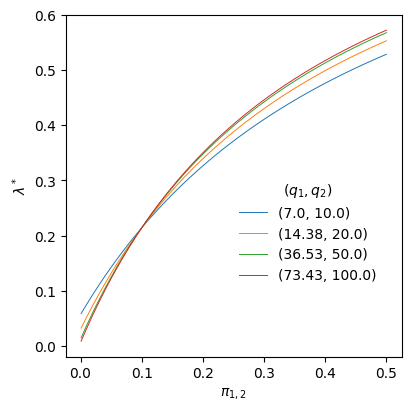

In [87]:
fig, ax = plt.subplots(1,1, figsize=(4,4), constrained_layout=True)
# q_pairs = [(8.67, 10.0), (17.53, 20.0), (88.31, 100.0)]
q_pairs = [(7.0, 10.0), (14.38, 20.0), (36.53,50.0), (73.43, 100.0)]

extSSDpath = getExternalSSDpath()
if os.path.exists(extSSDpath):
    path = extSSDpath + getProjectFoldername() + '/det_sols_from_polynomial/res_files'
else:
    path = '/res_files'

x=2
for q_pair in q_pairs:
    tline = pd.read_csv(f'{path}/Tline_sym_pis_q1_{q_pair[0]}_q2_{q_pair[1]}_f2_{int(x)}f1.csv')
    ax.plot(tline['pi'], tline['lambda'], lw=0.7, label=f'{q_pair}')
ax.set(xlabel='$\pi_{1,2}$', ylabel='$\lambda^*$')
ax.legend(title='$(q_1, q_2)$', frameon=False, loc=(0.5, 0.2))
fig.savefig(f'test_weber_law_QTlines_sym_pi_search_q1_fix_q2_start_from_q1_{q_pairs[0][0]}_q2_{q_pairs[0][1]}.png')

## What if we fix q1 and search q2...

In [81]:
def consensus_usual_eq(q2, pi1, pi2, l, q1, x, mu):
    'usual definition of consensus'
    'equation to be solved numerically'
    'instead of involving the strange F factor, this uses de usual f2-x*f1'
    _, f0, _ = f0_lambda_neq_0(pi1, pi2, q1, q2, l, mu)
    f1, f2 = f_i(1, f0, [pi1, pi2], [q1, q2], l, mu), f_i(2, f0, [pi1, pi2], [q1, q2], l, mu)
    return f2 - x*f1

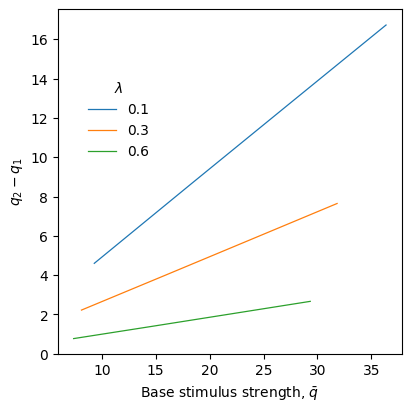

In [83]:
consensus_eq = consensus_usual_eq
Qlabel = 'Q'
# consensus_eq = consensus_f2_eq
# consensus_eq = consensus_usual_eq


q1s = [7.0, 14.0, 21.0, 28.0]

ls = [0.1, 0.3, 0.6]
# ls = [0.1, ]
pi1, pi2, x, mu = 0.1, 0.1, 2, 0.0

fig, ax = plt.subplots(1,1, figsize=(4,4), constrained_layout=True)
ax.set(xlabel=r'Base stimulus strength, $\bar{q}$', ylabel='$q_2 - q_1$')
for l in ls:
    q2s = []
    for q1 in q1s:
        q2_solve_lims = [q1,3*q1]
        q2 = bisect(consensus_eq, q2_solve_lims[0], q2_solve_lims[1], args=(pi1, pi2, l, q1, x, mu))
        q2s.append(q2)
    # base stimulus strenght:
    bss = [(q2+q1)/2 for q1,q2 in zip(q1s,q2s)]
    # bss = q2s
    # quality difference:
    delta_q = [(q2-q1) for q1,q2 in zip(q1s,q2s)]
    ax.plot(bss, delta_q, lw=0.9, label=f'{l}')
ax.set(ylim=(0,None))
fig.legend(title='$\lambda$', frameon=False, loc=(0.2, 0.6))
fig.savefig(f'test_weber_law_{Qlabel}_pi1_{pi1}_pi2_{pi2}_fix_q1_search_q2.png')

### Testing Weber's law but the stimulis is pi

In [29]:
def consensus_usual_eq_pi1(pi1, pi2, l, q1, q2, x, mu):
    'usual definition of consensus'
    'equation to be solved numerically'
    'instead of involving the strange F factor, this uses de usual f2-x*f1'
    _, f0, _ = f0_lambda_neq_0(pi1, pi2, q1, q2, l, mu)
    f1, f2 = f_i(1, f0, [pi1, pi2], [q1, q2], l, mu), f_i(2, f0, [pi1, pi2], [q1, q2], l, mu)
    return f2 - x*f1

def consensus_mod2_eq_pi1(pi1, pi2, l, q1, q2, x, mu):
    'modification to consensus mod, max(f0, x*f1) instead of x*max(f0,f1)'
    'equation to ve solved numerically'
    _, f0, _  = f0_lambda_neq_0(pi1, pi2, q1, q2, l, mu)
    f1, f2 = f_i(1, f0, [pi1, pi2], [q1, q2], l, mu), f_i(2, f0, [pi1, pi2], [q1, q2], l, mu)
    return f2 - max(f0, x*f1)

0.1 [0.050000000000727594, 0.10000000000007277, 0.15000000000069122, 0.19999999999865395, 0.2500000000008368]
0.3 [0.050000000000727594, 0.10000000000007277, 0.15000000000069122, 0.19999999999865395, 0.2500000000008368]
0.6 [0.050000000000727594, 0.10000000000007277, 0.15000000000069122, 0.19999999999865395, 0.2500000000008368]
0.9 [0.050000000000727594, 0.10000000000007277, 0.15000000000069122, 0.19999999999865395, 0.2500000000008368]


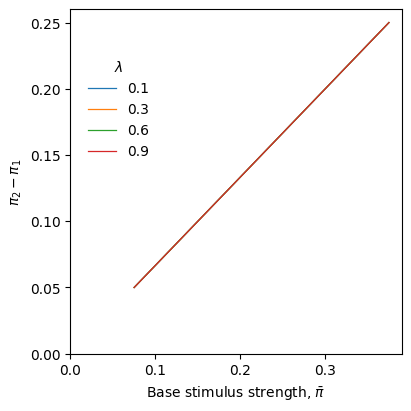

In [11]:
# consensus_eq = consensus_usual_eq_pi1
Qlabel = 'Q'
# consensus_eq = consensus_f2_eq_pi1
consensus_eq = consensus_mod2_eq_pi1

pi2s = [0.1, 0.2, 0.3, 0.4, 0.5]

ls = [0.1, 0.3, 0.6, 0.9]
# ls = [0.6, 0.9]
q1, q2, x, mu = 10.0, 10.0, 2, 0.0

fig, ax = plt.subplots(1,1, figsize=(4,4), constrained_layout=True)
ax.set(xlabel=r'Base stimulus strength, $\bar{\pi}$', ylabel='$\pi_2 - \pi_1$')
for l in ls:
    pi1s = []
    for pi2 in pi2s:
        pi1_solve_lims = [0.01,pi2]
        try:
            pi1 = bisect(consensus_eq, pi1_solve_lims[0], pi1_solve_lims[1], args=(pi2, l, q1, q2, x, mu))
            pi1s.append(pi1)
        except ValueError:
            pi1s.append(float('nan'))
    # base stimulus strenght:
    print(l, pi1s)
    bss = [(pi2+pi1)/2 for pi1,pi2 in zip(pi1s,pi2s)]
    # bss = q2s
    # quality difference:
    delta_pi = [(pi2-pi1) for pi1,pi2 in zip(pi1s,pi2s)]
    ax.plot(bss, delta_pi, lw=0.9, label=f'{l}')
ax.set(ylim=(0,None), xlim=(0,None))
fig.legend(title='$\lambda$', frameon=False, loc=(0.2, 0.6))
# fig.savefig(f'test_weber_law_{Qlabel}_pi1_{pi1}_pi2_{pi2}_fix_q2_search_q1.png')


In [5]:
pi1s

[0.050000000000727594,
 0.10000000000007277,
 0.15000000000069122,
 0.19999999999865395,
 0.2500000000008368]

## Figure for the paper

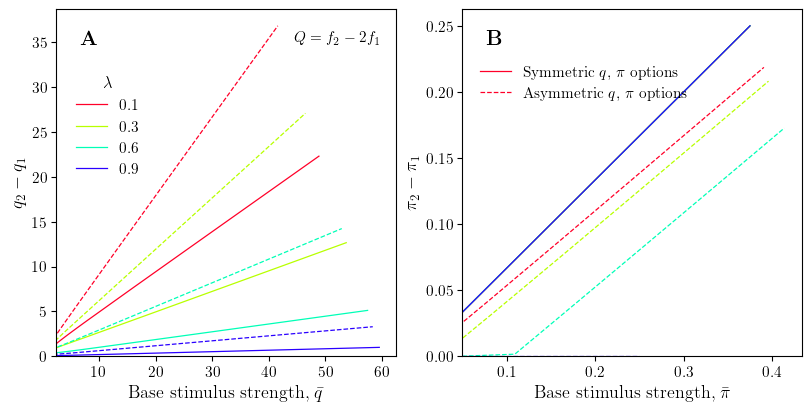

In [53]:
latexFont(titlesize=11, ticklabelssize=11, labelsize=13)
fig, ax = plt.subplots(1,2, figsize=(8,4), constrained_layout=True)
x, mu = 2, 0.0
ls = [0.1, 0.3, 0.6, 0.9]
ls_colors = plt.cm.gist_rainbow(np.linspace(0,0.8,len(ls)))
Qlabel = 'Q'

# LEFT Quality is the stimulus:
ax[0].set(xlabel=r'Base stimulus strength, $\bar{q}$', ylabel='$q_2 - q_1$')
consensus_eq = consensus_usual_eq_q1
q2s = [2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0, 30.0, 40.0, 50.0, 60.0]

pi1, pi2 = 0.1, 0.1
for l,lc in zip(ls,ls_colors):
    q1s = []
    for q2 in q2s:
        q1_solve_lims = [0.5,q2]
        try:
            q1 = bisect(consensus_eq, q1_solve_lims[0], q1_solve_lims[1], args=(pi1, pi2, l, q2, x, mu))
            q1s.append(q1)
        except ValueError:
            q1s.append(0.0)
    # base stimulus strenght:
    bss = [(q2+q1)/2 for q1,q2 in zip(q1s,q2s)]
    # quality difference:
    delta_q = [(q2-q1) if q1>0.0 else 0.0 for q1,q2 in zip(q1s,q2s)]
    ax[0].plot(bss, delta_q, lw=0.9, color=lc, label=f'{l}')

pi1, pi2 = 0.25, 0.15
for l,lc in zip(ls,ls_colors):
    q1s = []
    for q2 in q2s:
        q1_solve_lims = [0.5,q2]
        try:
            q1 = bisect(consensus_eq, q1_solve_lims[0], q1_solve_lims[1], args=(pi1, pi2, l, q2, x, mu))
            q1s.append(q1)
        except ValueError:
            q1s.append(float('nan'))
    # base stimulus strenght:
    bss = [(q2+q1)/2 for q1,q2 in zip(q1s,q2s)]
    # quality difference:
    delta_q = [(q2-q1) if q1>0.0 else 0.0 for q1,q2 in zip(q1s,q2s)]
    ax[0].plot(bss, delta_q, color=lc, lw=0.9, ls = '--')
# ax[0].set(ylim=(0,None), xlim=(0,None))
ax[0].set(ylim=(0.0,None), xlim=(2.5,None))



# LEFT Pi is the stimulus:
ax[1].set(xlabel=r'Base stimulus strength, $\bar{\pi}$', ylabel='$\pi_2 - \pi_1$')
consensus_eq = consensus_usual_eq_pi1

pi2s = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
# pi2s = np.arange(0.04, 0.52, 0.02)

q1, q2  = 10.0, 10.0
for l,lc in zip(ls,ls_colors):
    pi1s = []
    for pi2 in pi2s:
        pi1_solve_lims = [0.01,pi2]
        try:
            pi1 = bisect(consensus_eq, pi1_solve_lims[0], pi1_solve_lims[1], args=(pi2, l, q1, q2, x, mu))
            pi1s.append(pi1)
        except ValueError:
            # pi1s.append(float('nan'))
            pi1s.append(0.0)
    # base stimulus strenght:
    bss = [(pi2+pi1)/2 for pi1,pi2 in zip(pi1s,pi2s)]
    # bss = q2s
    # quality difference:
    delta_pi = [(pi2-pi1) if pi1>0.0 else 0.0 for pi1,pi2 in zip(pi1s,pi2s)]
    if l == 0.1:
        # ax[1].plot(bss, delta_pi, lw=0.9, label=f'$(q_1, q_2) = ({q1},{q2})$')
        ax[1].plot(bss, delta_pi, lw=0.9, color=lc, label=f'Symmetric $q$, $\pi$ options')
    else:
        ax[1].plot(bss, delta_pi, lw=0.9, color=lc)

q1, q2  = 9.0, 10.0
for l,lc in zip(ls,ls_colors):
    if l == 0.6:
        pi2s = np.arange(0.04, 0.51, 0.01)
    else:
        pi2s = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
    pi1s = []
    for pi2 in pi2s:
        pi1_solve_lims = [0.01,pi2]
        try:
            pi1 = bisect(consensus_eq, pi1_solve_lims[0], pi1_solve_lims[1], args=(pi2, l, q1, q2, x, mu))
            pi1s.append(pi1)
        except ValueError:
            # pi1s.append(float('nan'))
            pi1s.append(0.0)
    # base stimulus strenght:
    bss = [(pi2+pi1)/2 for pi1,pi2 in zip(pi1s,pi2s)]
    # bss = q2s
    # quality difference:
    delta_pi = [(pi2-pi1) if pi1>0.0 else 0.0 for pi1,pi2 in zip(pi1s,pi2s)]
    # print(l, delta_pi)
    if l == 0.1:
        # ax[1].plot(bss, delta_pi, lw=0.9, label=f'$(q_1, q_2) = ({q1},{q2})$')
        ax[1].plot(bss, delta_pi, lw=0.9, ls='--', color=lc, label=f'Asymmetric $q$, $\pi$ options')
    else:
        ax[1].plot(bss, delta_pi, lw=0.9, ls='--', color=lc)
# ax[1].set(ylim=(0,None), xlim=(0,None))
ax[1].set(ylim=(0.0,None), xlim=(0.05,None))



QtextPos = (0.36, 0.91)
if Qlabel == 'Q':
    fig.text(QtextPos[0], QtextPos[1], r'$Q = f_2 - 2 f_1$', fontsize=11)
elif Qlabel == 'Qmod2':
    fig.text(QtextPos[0], QtextPos[1], r'$Q = f_2 - max(f_0, 2 f_1)$', fontsize=11)
elif Qlabel == 'f2':
    fig.text(QtextPos[0], QtextPos[1], r'$Q = f_2 - f_2^{th}$', fontsize=11)

ax[0].legend(title='$\lambda$', frameon=False, fontsize=11, title_fontsize=12, loc=(0.04, 0.5))
ax[1].legend(frameon=False, fontsize=11, title_fontsize=12, loc=(0.035, 0.72))

ax[0].text(0.07,0.9, r'$\textbf{A}$', transform=ax[0].transAxes)
ax[1].text(0.07,0.9, r'$\textbf{B}$', transform=ax[1].transAxes)

# fig.savefig(f'test_weber_law_{Qlabel}_pi1_{pi1}_pi2_{pi2}_fix_q2_search_q1.png')
# fig.savefig(f'test_weber_law_{Qlabel}_pi1_{pi1}_pi2_{pi2}_fix_q2_search_q1.pdf')
fig.savefig('weber_law_provisional.pdf')

In [3]:
extSSDpath = getExternalSSDpath()
if os.path.exists(extSSDpath):
    path = extSSDpath + getProjectFoldername() + '/sim_some_params_rework/results'
else:
    path = '/results'

In [75]:
Nsites = 2
df = pd.read_csv(f'{path}/results_sim_Nsites_{Nsites}.csv')

In [77]:
df10 = df.query('N ==10.0 & pi1 == 0.1 & pi2 == 0.1 & l == 0.6')
# df50 = df.query('N ==50.0 & pi1 == 0.1 & pi2 == 0.1 & l == 0.6')
# df100 = df.query('N ==100.0 & pi1 == 0.1 & pi2 == 0.1 & l == 0.6')

In [78]:
df10

,N,pi1,pi2,q1,q2,l,f0,f1,f2,sdf0,sdf1,sdf2,Q,sdQ,Nrea,simTime,ic
0,10.0,0.1,0.1,8.0,10.0,0.6,0.170115,0.235981,0.593903,0.125943,0.252532,0.273665,0.121941,0.758675,500.0,2000.0,N
1,10.0,0.1,0.1,8.1,10.0,0.6,0.170095,0.245119,0.584786,0.125938,0.254928,0.274916,0.094548,0.764816,500.0,2000.0,N
2,10.0,0.1,0.1,8.2,10.0,0.6,0.170031,0.260144,0.569825,0.125349,0.262180,0.280535,0.049537,0.785560,500.0,2000.0,N
3,10.0,0.1,0.1,8.3,10.0,0.6,0.169232,0.265099,0.565669,0.125362,0.263650,0.280919,0.035470,0.788912,500.0,2000.0,N
4,10.0,0.1,0.1,8.4,10.0,0.6,0.168437,0.269211,0.562352,0.125242,0.266142,0.282752,0.023930,0.795904,500.0,2000.0,N
5,10.0,0.1,0.1,8.5,10.0,0.6,0.168696,0.277039,0.554265,0.125235,0.269602,0.285322,0.000186,0.805588,500.0,2000.0,N
6,10.0,0.1,0.1,8.6,10.0,0.6,0.167549,0.278790,0.553662,0.124638,0.268968,0.284118,-0.003918,0.803220,500.0,2000.0,N
7,10.0,0.1,0.1,8.8,10.0,0.6,0.167632,0.308168,0.524200,0.124818,0.284645,0.296586,-0.092136,0.847861,50.0,2000.0,N
8,10.0,0.1,0.1,8.9,10.0,0.6,0.164894,0.300100,0.535006,0.123600,0.277364,0.290606,-0.065194,0.827277,50.0,2000.0,N
9,10.0,0.1,0.1,9.0,10.0,0.6,0.164750,0.333576,0.501674,0.123392,0.289371,0.299940,-0.165478,0.861311,50.0,2000.0,N


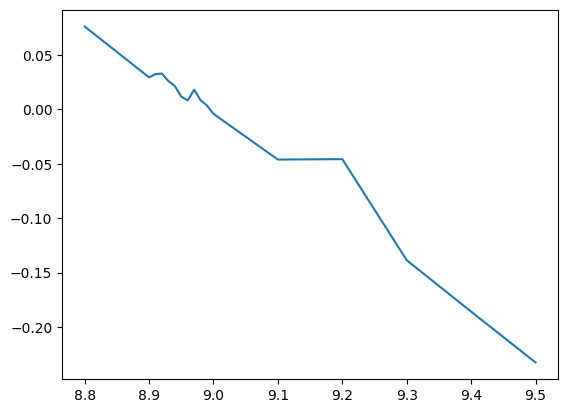

In [54]:
fig, ax = plt.subplots()
ax.plot(df100['q1'], df100['Q'])
# df

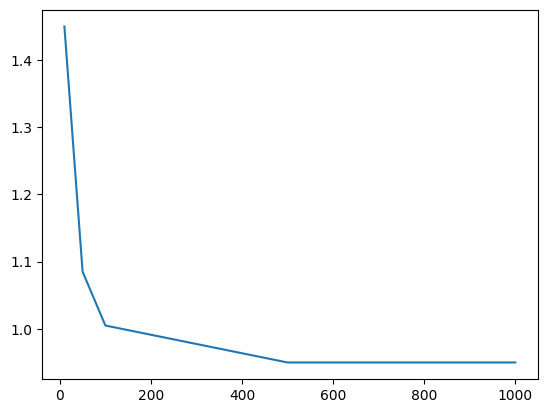

In [80]:
Ns = [10, 50, 100, 500, 1000]
q1s = [8.55,8.915,8.995,9.05, 9.05]
deltaq = [10-q1 for q1 in q1s]

fig, ax = plt.subplots()
ax.plot(Ns, deltaq)